# Lab 5: Image Inpainting

For 18-793 Image and Video Processing course. By Sarun Gulyanon.

This Jupyter Notebook demonstrates basic image inpainting techniques using OpenCV and NumPy: Navier-Stokes based and fast marching method based techniques.

The code is organized as follows:
1. **Astronaut Image Inpainting**: We begin by applying inpainting to an astronaut image, specifying the region to be restored and using inpainting techniques. This attempts to showcase the inpainting techniques on a real-world image.
2. **Box Image Inpainting**: We generate a synthetic image of a box and apply inpainting to a selected region. This showcases the inpainting techniques on corner and edge regions.
3. **Gradient Image Inpainting**: We create a synthetic gradient image and perform inpainting on a designated region. This demonstrates the inpainting techniques on a smooth gradient image.

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

## 1. Astronaut Image Inpainting

First, we prepare the image and mask for inpainting. 

In [14]:
# Load the image
image = data.astronaut()
# image = cv.imread('path_to_your_image.jpg')
# image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Create a mask
mask = np.zeros(image.shape[:2], dtype=np.uint8)
# Example: Draw a white rectangle on the mask
mask[50:150, 50:150] = 255
mask[275:325, 75:125] = 255

We also create another image with rectangle around the inpainting region for visualization only.

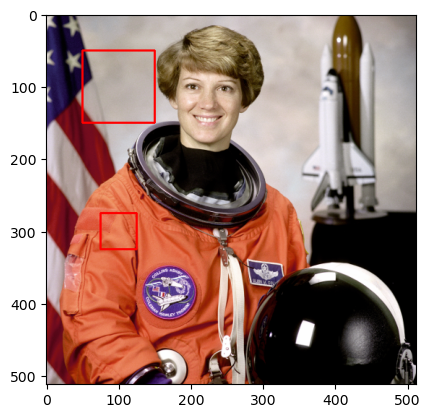

In [15]:
# Draw a rectangle around the mask area on the original image for visualization
image_with_rect = image.copy()
cv.rectangle(image_with_rect, (50, 50), (150, 150), (255, 0, 0), 2)
cv.rectangle(image_with_rect, (75, 275), (125, 325), (255, 0, 0), 2)

plt.imshow(image_with_rect)
plt.show()

Apply both image inpainting techniques using OpenCV's `cv.INPAINT_TELEA` (Fast Marching Method) and `cv.INPAINT_NS` (Navier-Stokes based method) to restore missing regions in an image.

In [16]:
# Apply inpainting using INPAINT_TELEA
inpaint_telea = cv.inpaint(image, mask, 3, cv.INPAINT_TELEA)

# Apply inpainting using INPAINT_NS
inpaint_ns = cv.inpaint(image, mask, 3, cv.INPAINT_NS)

Display the results side by side for comparison.

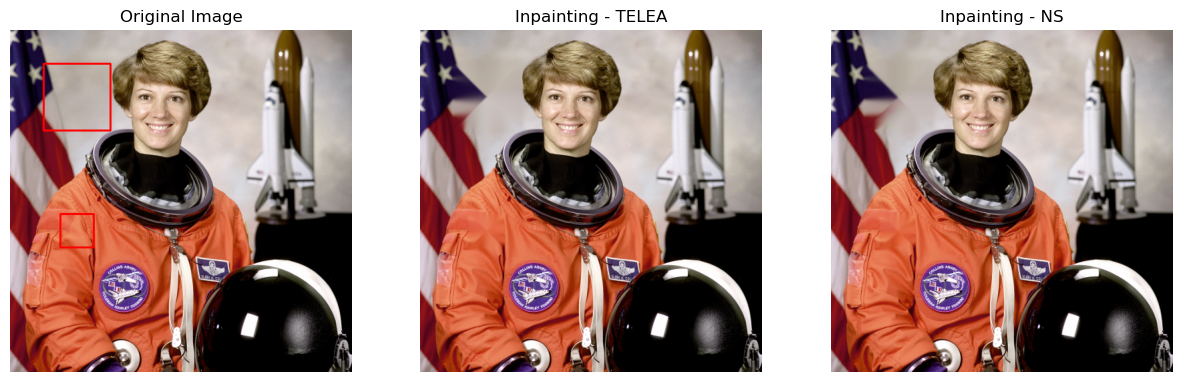

In [17]:
# Display the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image_with_rect)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(inpaint_telea)
axes[1].set_title('Inpainting - TELEA')
axes[1].axis('off')

axes[2].imshow(inpaint_ns)
axes[2].set_title('Inpainting - NS')
axes[2].axis('off')

plt.show()

## 2. Box Image Inpainting

Next, we generate a synthetic image of a box and apply inpainting to a selected region. We follow the same steps as above to inpaint the missing region. You should notice that the fast marching based methods handle corner and edge regions better than the Navier-Stokes based method. This is because the fast marching method prioritizes the inpainting with the edge continuity and gradient coherence.

(-0.5, 199.5, 199.5, -0.5)

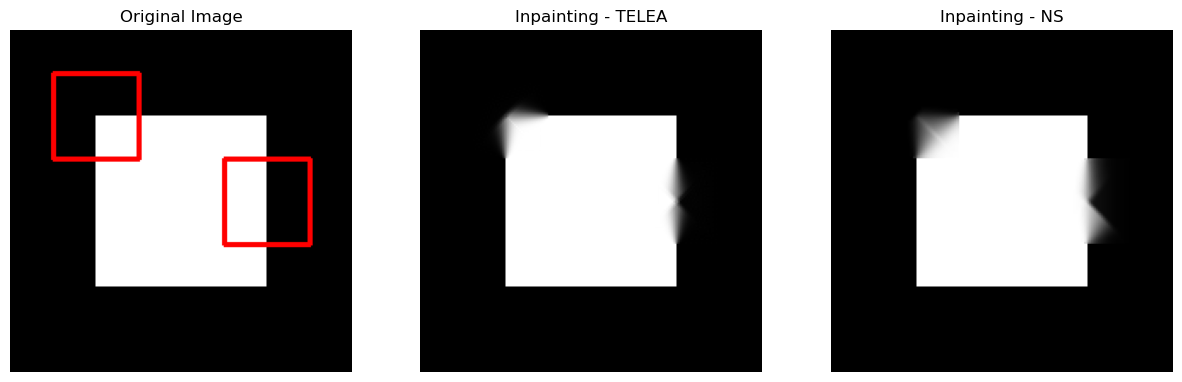

In [18]:
# Create a box image
box_image = np.zeros((200, 200), np.uint8)
box_image[50:150, 50:150] = 255

# Create a mask
box_mask = np.zeros(box_image.shape[:2], dtype=np.uint8)
box_mask[25:75, 25:75] = 255        # corner region
box_mask[75:125, 125:175] = 255     # edge region

# Draw a rectangle around the mask area on the original image for visualization
box_imagee_with_rect = cv.cvtColor(box_image, cv.COLOR_GRAY2RGB)
cv.rectangle(box_imagee_with_rect, (25, 25), (75, 75), (255, 0, 0), 2)
cv.rectangle(box_imagee_with_rect, (125, 75), (175, 125), (255, 0, 0), 2)

# Apply inpainting on box image using INPAINT_TELEA
inpaint_box_telea = cv.inpaint(box_image, box_mask, 3, cv.INPAINT_TELEA)

# Apply inpainting on box image using INPAINT_NS
inpaint_box_ns = cv.inpaint(box_image, box_mask, 3, cv.INPAINT_NS)

# Display the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(box_imagee_with_rect)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(inpaint_box_telea, cmap="gray")
axes[1].set_title('Inpainting - TELEA')
axes[1].axis('off')

axes[2].imshow(inpaint_box_ns, cmap="gray")
axes[2].set_title('Inpainting - NS')
axes[2].axis('off')

## 3. Gradient Image Inpainting

We create a synthetic gradient image and perform inpainting on a designated region. We follow the same steps as above to inpaint the missing region. You should notice that the Navier-Stokes based method handles smooth gradient regions better than the fast marching based method. This is because the Navier-Stokes based method smoothly extending isophotes, which works well for textures and gradual transitions.

(-0.5, 255.5, 255.5, -0.5)

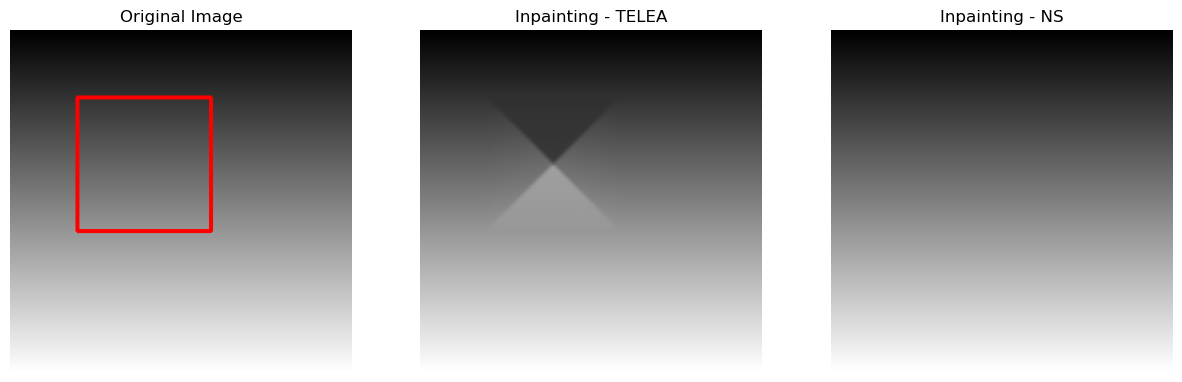

In [19]:
# Create a gradient image
gradient_image = np.zeros((256, 256), np.uint8)
for i in range(gradient_image.shape[0]):
    gradient_image[i] = i

# Create a mask
gradient_mask = np.zeros(gradient_image.shape[:2], dtype=np.uint8)
gradient_mask[50:150, 50:150] = 255

# Draw a rectangle around the mask area on the original image for visualization
gradient_image_with_rect = cv.cvtColor(gradient_image, cv.COLOR_GRAY2RGB)
cv.rectangle(gradient_image_with_rect, (50, 50), (150, 150), (255, 0, 0), 2)

# Apply inpainting on gradient image using INPAINT_TELEA
inpaint_gradient_telea = cv.inpaint(gradient_image, gradient_mask, 3, cv.INPAINT_TELEA)

# Apply inpainting on gradient image using INPAINT_NS
inpaint_gradient_ns = cv.inpaint(gradient_image, gradient_mask, 3, cv.INPAINT_NS)

# Display the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(gradient_image_with_rect, cmap="gray")
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(inpaint_gradient_telea, cmap="gray")
axes[1].set_title('Inpainting - TELEA')
axes[1].axis('off')

axes[2].imshow(inpaint_gradient_ns, cmap="gray")
axes[2].set_title('Inpainting - NS')
axes[2].axis('off')

----